![qqq](../resources/header.jpg)

**Статистический анализ данных**
***

О сайте **Backloggd.com**:

'**Backloggd** — это место для хранения вашей личной коллекции видеоигр. Каждая игра со всех платформ доступна для вас, чтобы вы могли войти в свой журнал. Следуйте за друзьями, чтобы поделиться своими отзывами и сравнить рейтинги. Затем используйте фильтры, чтобы отсортировать свою коллекцию и посмотреть, что для вас важно. Ведите список того, во что вы сейчас играете и во что хотите играть, и наблюдайте, как цифры меняются по мере того, как вы продолжаете записывать свои прохождения. Есть Goodreads для книг, Letterboxd для фильмов и теперь Backloggd для игр.

Все метаданные, связанные с игрой, поступают из базы данных **[IGDB](https://www.igdb.com/)**, управляемой сообществом . Сюда входят все данные об играх, компаниях и платформах, которые вы видите на сайте.' - с сайта **[backloggd.com](https://www.backloggd.com/)**.

**Цель статистического анализа данных**: подтвердить или опровергнуть закономерности, выявленные на этапе разведочного анализа данных.

**Этапы статистичсекго анализа**:
1. [Обзор данных](#Обзор-данных).
2. [Предварительная обработка данных](Предварительная-обработка-данных)
3. [Статистический анализ данных](#Статистический-анализ-данных)
    1. [Рейтинг видеоигр](#Рейтинг-видеоигр):
        - [Оценка распределения](#Оценка-распределения);
        - [Оценка влияния факторов](#Оценка-влияния-факторов):
            - [Тип разрабочика](#Тип-разрабочика);
            - [Игровая платформа](#Игровая-платформа);
            - [Игровой жанр](#Игровой-жанр).
4. [Выводы](#Выводы)
***

In [1]:
import sys

In [2]:
sys.path.append('C:\Projects\Backloggd\src')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.gridspec import GridSpec
from scipy import stats

from config.paths import PATH_PREPROCESSED_DATA
from utils.explorer import explorer
from utils import plot

In [4]:
RANDOM_STATE = 42

In [5]:
sns.set_style('white')

In [6]:
print(explorer(PATH_PREPROCESSED_DATA, exclude=('checkpoints', )))

1. backloggd.


In [7]:
folder = 'backloggd'

In [8]:
print(explorer(f'{PATH_PREPROCESSED_DATA}/{folder}', '*.csv'))

1. developers.csv.
2. games.csv.
3. genres.csv.
4. platforms.csv.
5. scores.csv.


In [9]:
file_paths ={
    'games': f'{PATH_PREPROCESSED_DATA}/{folder}/games.csv',
    'developers': f'{PATH_PREPROCESSED_DATA}/{folder}/developers.csv',
    'genres': f'{PATH_PREPROCESSED_DATA}/{folder}/genres.csv',
    'platforms': f'{PATH_PREPROCESSED_DATA}/{folder}/platforms.csv',
    'scores': f'{PATH_PREPROCESSED_DATA}/{folder}/scores.csv',
}

# Обзор данных
***

In [10]:
df = {file: pd.read_csv(path) for file, path in file_paths.items()}

In [11]:
df['games'].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141741 entries, 0 to 141740
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           141741 non-null  int64  
 1   name         141741 non-null  object 
 2   date         120064 non-null  object 
 3   indie        141741 non-null  bool   
 4   rating       38949 non-null   float64
 5   votes        141741 non-null  int64  
 6   reviews      141741 non-null  int64  
 7   plays        141741 non-null  int64  
 8   playing      141741 non-null  int64  
 9   backlogs     141741 non-null  int64  
 10  wishlists    141741 non-null  int64  
 11  description  128451 non-null  object 
dtypes: bool(1), float64(1), int64(7), object(3)
memory usage: 80.7 MB


In [12]:
pd.concat([
    df['games'].head(),
    df['games'].sample(5),
    df['games'].tail()
])

,id,name,date,indie,rating,votes,reviews,plays,playing,backlogs,wishlists,description
0,1000001,Cathode Ray Tube Amusement Device,1947-12-31,False,3.529070,86,65,117,1,28,56,The cathode ray tube amusement device is the e...
1,1000002,Bertie the Brain,1950-08-25,False,2.535714,14,11,24,0,6,12,Currently considered the first videogame in hi...
2,1000003,Nim,1951-12-31,False,1.750000,6,2,11,0,2,6,The Nimrod was a special purpose computer that...
3,1000004,Draughts,1952-08-31,False,2.388889,9,3,17,0,3,7,A game of draughts (a.k.a. checkers) written f...
4,1000005,OXO,1952-12-31,False,3.066667,30,14,52,1,12,13,OXO was a computer game developed by Alexander...
47535,1054697,Puzzle by Nikoli W Numberlink,2013-05-17,False,NaN,0,0,0,0,0,0,Numberlink is a puzzle where you connect the s...
62565,1070869,Basketball PVP,2016-10-23,False,NaN,3,0,4,0,0,0,Realtime online 1 on 1 basketball action! Pump...
14417,1018186,Burnout,1996-12-31,False,NaN,0,0,3,0,0,1,Earth 2045 is a very different place from the ...
55101,1062833,Megami Quest 2,2015-06-01,True,NaN,1,1,2,0,0,0,"An incremental RPG where you play as Megami, a..."
137383,1162454,Holoearth,NaN,False,NaN,0,0,0,0,4,16,A new frontier awaits. Holoearth is an open-wo...


In [13]:
df['developers'].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122782 entries, 0 to 122781
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         122782 non-null  int64 
 1   developer  122781 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.2 MB


In [14]:
pd.concat([
    df['developers'].head(),
    df['developers'].sample(5),
    df['developers'].tail()
])

,id,developer
0,1000002,Josef Kates
1,1000004,Christopher Strachey
2,1000005,"Alexander Shafto ""Sandy"" Douglas"
3,1000005,University of Warwick
4,1000007,William Higinbotham
16491,1017176,T&E Soft
95907,1101537,Ben Lapid
32865,1031847,Sega Europe
114726,1132225,Blazing Griffin Ltd.
8087,1008748,American Sammy


In [15]:
df['genres'].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198108 entries, 0 to 198107
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      198108 non-null  int64 
 1   genre   198108 non-null  object
dtypes: int64(1), object(1)
memory usage: 13.8 MB


In [16]:
pd.concat([
    df['genres'].head(),
    df['genres'].sample(5),
    df['genres'].tail()
])

,id,genre
0,1000001,Point-and-Click
1,1000002,Puzzle
2,1000002,Tactical
3,1000003,Pinball
4,1000003,Strategy
93813,1073574,Simulator
132566,1101748,Adventure
2451,1002382,RPG
76477,1061510,Sport
93715,1073498,Shooter


In [17]:
df['platforms'].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224888 entries, 0 to 224887
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        224888 non-null  int64 
 1   platform  224888 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.0 MB


In [18]:
pd.concat([
    df['platforms'].head(),
    df['platforms'].sample(5),
    df['platforms'].tail()
])

,id,platform
0,1000001,Analogue electronics
1,1000002,Arcade
2,1000003,Ferranti Nimrod Computer
3,1000004,Legacy Computer
4,1000005,Windows PC
193933,1120936,Windows PC
71947,1050673,PlayStation Vita
219622,1138745,BBC Microcomputer System
137422,1086021,Windows PC
188953,1117823,Windows PC


In [19]:
df['scores'].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417410 entries, 0 to 1417409
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   id      1417410 non-null  int64  
 1   score   1417410 non-null  float64
 2   amount  1417410 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 32.4 MB


In [20]:
pd.concat([
    df['scores'].head(),
    df['scores'].sample(5),
    df['scores'].tail()
])

,id,score,amount
0,1000001,0.5,10
1,1000001,1.0,5
2,1000001,1.5,1
3,1000001,2.0,3
4,1000001,2.5,9
644157,1072905,4.0,0
1106326,1126186,3.5,1
1224593,1140181,2.0,0
211724,1025845,2.5,16
575972,1065507,1.5,0


# Предварительная обработка данных

In [21]:
records = {name: data.shape[0] for name, data in df.items()}
records

{'games': 141741,
 'developers': 122782,
 'genres': 198108,
 'platforms': 224888,
 'scores': 1417410}

## Обработка типов данных
***

In [22]:
index = pd.MultiIndex.from_arrays(
    arrays=[
        [name for name, data in df.items() for _ in range(len(data.dtypes))],
        [index for data in df.values() for index in data.dtypes.index]
    ],
    names=['Набор данных', 'Поля']
)
values = [value for data in df.values() for value in data.dtypes.values]
pd.DataFrame(
    data=values,
    index=index,
    columns=['Типы данных']
).style

Изменим типы данных:
- для поля **date** в наборе **games** изменим тип данных на **datetime**;
- для **числовых полей**, уменьшим точность до **32 бит**.

In [23]:
df['games']['date'] = pd.to_datetime(df['games']['date'], format='%Y-%m-%d')

In [24]:
df['games'] = df['games'].astype(
    {
        'votes': 'int32',
        'reviews': 'int32',
        'plays': 'int32',
        'playing': 'int32',
        'backlogs': 'int32',
        'wishlists': 'int32',
        'rating': 'float32'
    }
)

In [25]:
for name in df:
    df[name] = df[name].astype({'id': 'int32'})

In [26]:
index = pd.MultiIndex.from_arrays(
    arrays=[
        [name for name, data in df.items() for _ in range(len(data.dtypes))],
        [index for data in df.values() for index in data.dtypes.index]
    ],
    names=['Набор данных', 'Поля']
)
values = [value for data in df.values() for value in data.dtypes.values]
pd.DataFrame(
    data=values,
    index=index,
    columns=['Типы данных']
).style

## Обработка явных дубликатов
***

In [27]:
table = pd.DataFrame(
    data={
        'Количество': [data.duplicated().sum() for data in df.values()],
        'Проценты': [data.duplicated().sum() / records[name] for name, data in df.items()],
    },
    index=[data for data in df]
)
table.loc['Всего', :] = [table['Количество'].sum(),  
                         table['Количество'].sum() / 
                         sum([record for record in records.values()])]
table = table.astype({'Количество': 'int32'})
(table
 .style
 .format({'Проценты': lambda x: f'{x:.2%}'}))

,Количество,Проценты
games,0,0.00%
developers,0,0.00%
genres,0,0.00%
platforms,0,0.00%
scores,0,0.00%
Всего,0,0.00%


## Анализ пустых записей
***

In [28]:
index = pd.MultiIndex.from_arrays(
    arrays=[
        [name for name, data in df.items() for _ in range(len(data.dtypes))],
        [index for data in df.values() for index in data.dtypes.index]
    ],
    names=['Набор данных', 'Поле']
)
values = {
    'Количество': [value for data in df.values() for value in data.isna().sum().values],
    'Проценты': [value / records[name] for name, data in df.items() for value in data.isna().sum().values],
}
(pd.DataFrame(
    data=values,
    index=index,
).style
 .format({'Проценты': lambda x: f'{x:.2%}'}))

# Статистический анализ данных

## Рейтинг видеоигр
***

Оценка влияния факторов на ретинг видеоигр будет проводится с помощью **t-теста** и **одностороннего дисперсионного анализа (ANOVA)** с помледующим проведением апостериорного тест множественного сравнения **Tukey HSD**. 

Чтобы результаты ANOVA были действительными, должны выполняться следующие **допущения**:
1. **Нормальное распределение** — каждая выборка была взята из нормально распределенной популяции.
2. **Равные дисперсии** — дисперсии совокупностей, из которых взяты выборки, равны.
3. **Независимость** — наблюдения в каждой группе независимы друг от друга, а наблюдения внутри групп были получены методом случайной выборки.

### Оценка распределения
***

Давайте построим гистограмму и график QQ для визуальной оценки распределения.

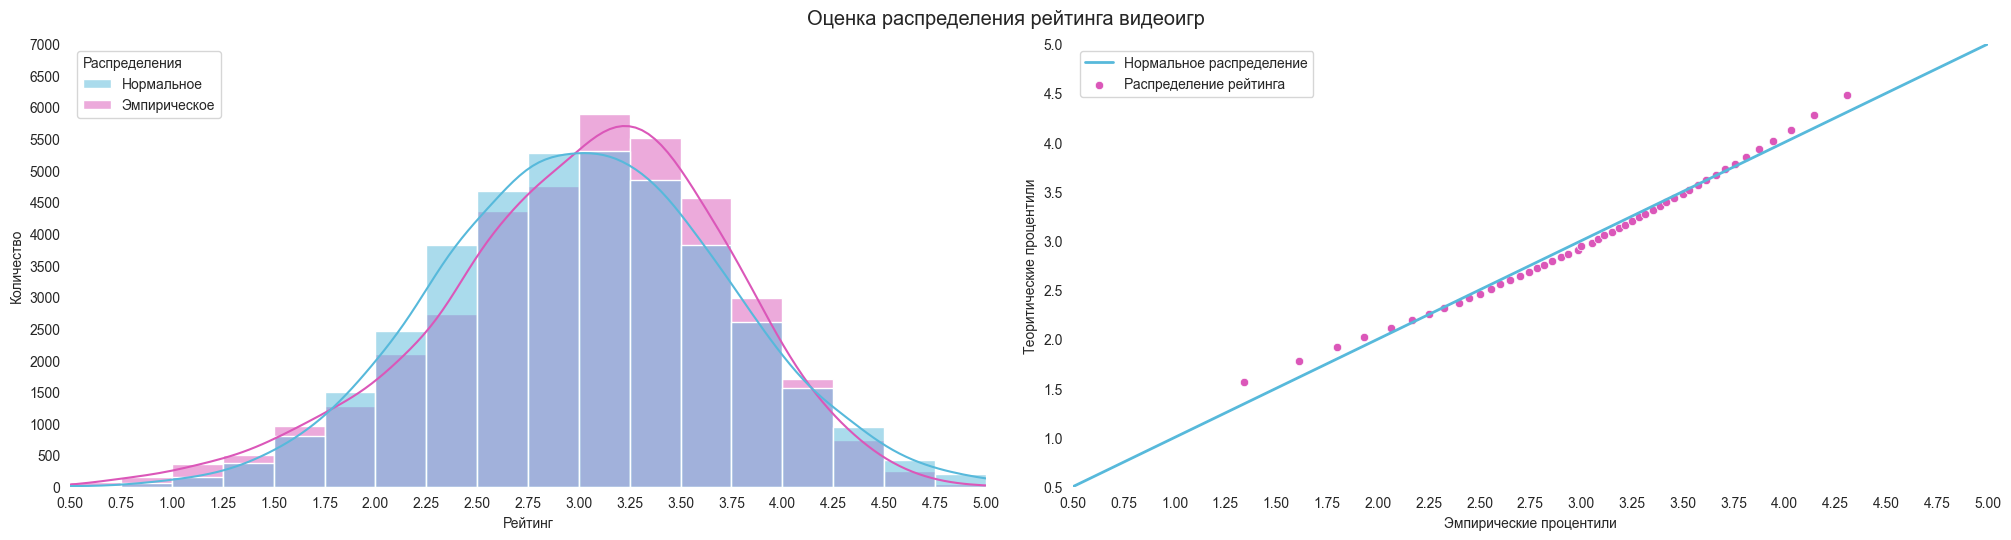

In [29]:
figure = plt.figure(
    layout='constrained',
    figsize=(20, 5)
)

figure.suptitle(
    t='Оценка распределения рейтинга видеоигр', 
    y=1.05, 
    fontsize='x-large'
)

grid = GridSpec(
    figure=figure,
    nrows=1, 
    ncols=2, 
    wspace=0.025
)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

rating_distribution = df['games'].loc[df['games']['rating'].notna(), 'rating']
normal_distribution = np.random.normal(
    loc=rating_distribution.mean(), 
    scale=rating_distribution.std(), 
    size=rating_distribution.size
)
percentiles = np.linspace(0, 100, 51)
rating = np.percentile(rating_distribution, percentiles)
normal = np.percentile(normal_distribution, percentiles)

plot_data = (pd.concat(
    objs=[pd.DataFrame({'value': normal_distribution,
                        'type': ['theoretical']*normal_distribution.size}),
          pd.DataFrame({'value': df['games']['rating'],
                        'type': ['sample']*df['games']['rating'].size})])
             .reset_index(drop=True))

sns.histplot(
    data=plot_data,
    x='value',
    hue='type',
    bins=np.linspace(0.5, 5.0, 19),
    kde=True,
    kde_kws={'bw_adjust': 1.5},
    ax=figure.axes[0], 
    palette=sns.color_palette('hls', 15)[8::5]
)

figure.axes[0].set_xlabel('Рейтинг')
figure.axes[0].set_ylabel('Количество')
figure.axes[0].set_xbound((0.5, 5.0))
figure.axes[0].set_xticks(np.linspace(0.5, 5.0, 19))
s, maximum = plot.step(figure.axes[0].get_yticks().max() - 1)
figure.axes[0].set_yticks(np.arange(0, maximum + 1, s))
figure.axes[0].legend(
    handles=figure.axes[0].get_legend().legend_handles,
    labels=['Нормальное', 'Эмпирическое'],
    title='Распределения',
    loc='upper left',
    alignment='left')

sns.lineplot(
    x=normal, 
    y=normal,
    linewidth=2.0,
    ax=figure.axes[1], 
    label='Нормальное распределение', 
    color=sns.color_palette('hls', 15)[8]
)

sns.scatterplot(
    x=rating,
    y=normal, 
    sizes=8,
    ax=figure.axes[1], 
    label='Распределение рейтинга', 
    color=sns.color_palette('hls', 15)[13]
)

figure.axes[1].set_xlabel('Эмпирические процентили')
figure.axes[1].set_ylabel('Теоритические процентили')
figure.axes[1].set_xbound((0.5, 5.0))
figure.axes[1].set_xticks(np.linspace(0.5, 5.0, 19))
figure.axes[1].set_ybound((0.5, 5.0))
figure.axes[1].set_yticks(np.linspace(0.5, 5.0, 10))
figure.axes[1].legend(alignment='left')

for i in range(2):
    for s in 'top', 'right', 'bottom', 'left':
            figure.axes[i].spines[s].set_visible(False)

Путем визуальной оценки гистограммы и графика Q-Q можно сделать вывод, что распределение данных рейтинга видеоигр подчиняется закону распределения, который **близок к нормальному**.

Воспользуемся тестом **Шапиро-Уилка**, чтобы проверить выборку на соответствие нормальному распределению. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: данные выборки **получены** из нормально распределенной популяции.
- **H1**: данные выборки **не получены** из нормально распределенной популяции.
  
Установим p-уровень значимости **0.05** и проведем тест **Шапиро-Уилка**.

In [30]:
size = 500
sample = (df['games']
          .loc[df['games']['rating'].notna(), 'rating']
          .sample(
              n=size, 
              random_state=RANDOM_STATE, 
              ignore_index=True
              ))
sample

0      2.800000
1      3.105263
2      3.785714
3      3.428571
4      3.214286
         ...   
495    3.129630
496    2.518396
497    3.523256
498    3.391566
499    3.360000
Name: rating, Length: 500, dtype: float32

In [31]:
result = stats.shapiro(sample)
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 0.98415.
p-value: 2.86766e-05


По результатам теста **Шапиро-Уилка**, **нельзя утверждать**, что рейтинг видеоигр подчиняется **нормальному** закону распределения.

### Оценка влияния факторов

#### Тип разрабочика

Сформируем группы с помощью протсых случайных выборок.

In [32]:
size = 500
groups = pd.DataFrame(
    data={
        'company': (df['games']
                    .loc[(~df['games']['indie']) & (df['games']['rating'].notna()), 'rating']
                    .sample(
                        n=size, 
                        random_state=RANDOM_STATE, 
                        ignore_index=True
                    )),
        'indie': (df['games']
                  .loc[(df['games']['indie']) & (df['games']['rating'].notna()), 'rating']
                  .sample(
                      n=size, 
                      random_state=RANDOM_STATE, 
                      ignore_index=True
                  ))
    }
)
groups

,company,indie
0,2.083333,2.444444
1,4.400000,2.722222
2,4.421052,3.380062
3,3.188679,3.444444
4,3.807735,1.521739
...,...,...
495,3.200000,3.263158
496,1.583333,3.361111
497,2.961539,3.598133
498,3.056818,2.129032


Воспользуемся **тестом Бартлетта**, чтобы проверить выборки на равенство дисперсий. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: дисперсии популяций, из которых взяты выборки, **равны**.
- **H1**: дисперсии популяций, из которых взяты выборки, **не равны**.

Установим p-уровень значимости **0.05** и проведем **тест Бартлетта**.

In [33]:
result = stats.bartlett(groups['company'], groups['indie'])
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 0.29814.
p-value: 5.85053e-01


Воспользуемся **t-тестом**, чтобы оценить влияние типа разработчика на ретийнг видеоигр. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: среднии значения популяций, из которых взяты выборки, **равны**.
- **H1**: среднии значения популяций, из которых взяты выборки, **не равны**.

Установим p-уровень значимости **0.05** и проведем **t-тест**.

In [34]:
result = stats.ttest_ind(
    a=groups['company'], 
    b=groups['indie'], 
    equal_var=True,
    random_state=RANDOM_STATE
)
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 4.47630.
p-value: 8.46937e-06


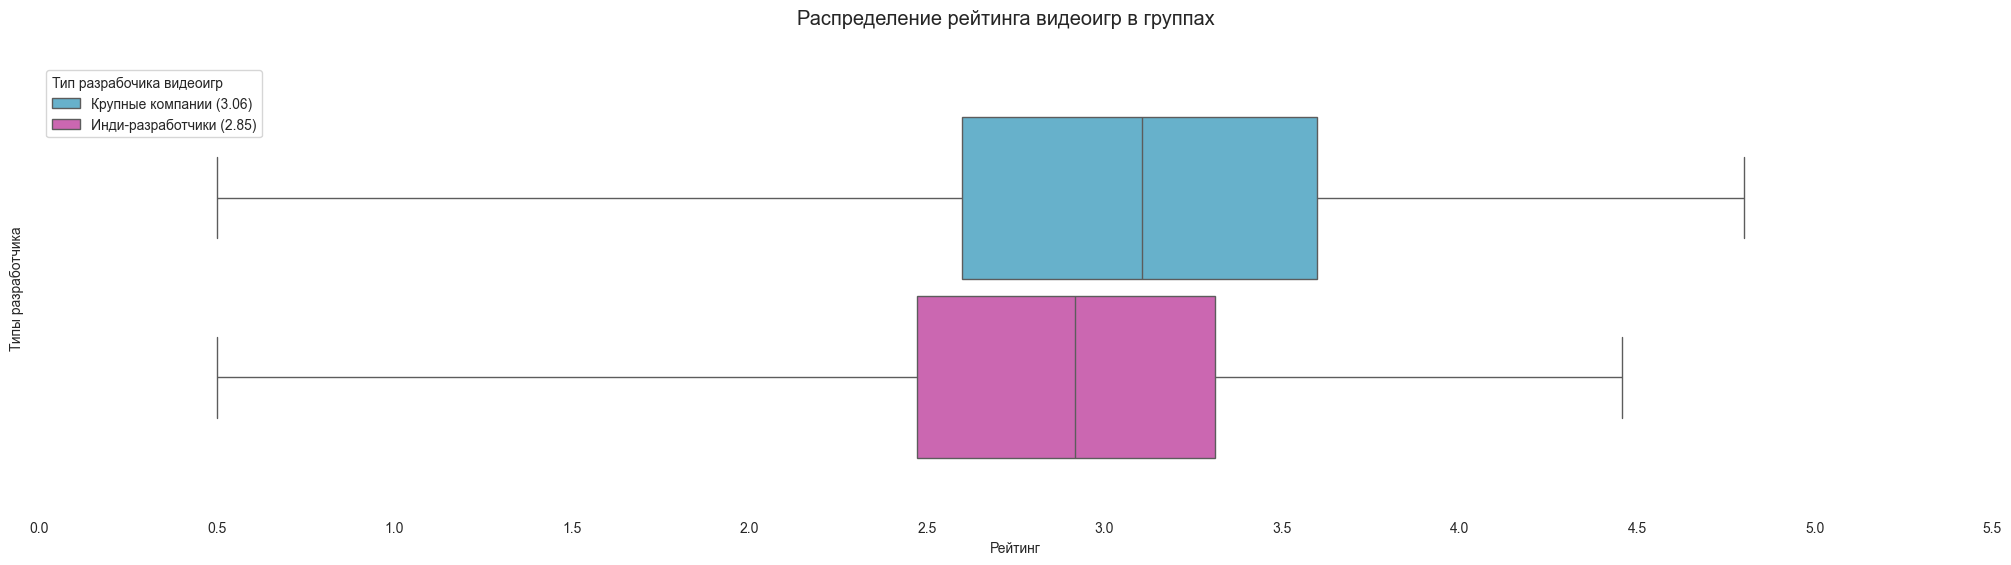

In [35]:
figure = plt.figure(
    layout="constrained",
    figsize=(20, 5)
)

figure.suptitle(
    t='Распределение рейтинга видеоигр в группах', 
    y=1.1, 
    fontsize='x-large'
)

figure.add_subplot()

plot_data = (groups
             .unstack()
             .reset_index(level=0)
             .rename(columns={'level_0': 'group', 0: 'value'}))

sns.boxplot(
    data=plot_data,
    x='value',
    hue='group',
    whis=(0, 100),
    gap=0.1,
    palette=sns.color_palette('hls', 15)[8::5],
    ax=figure.axes[0],
)

figure.axes[0].set_xlabel('Рейтинг')
figure.axes[0].set_ylabel('Типы разработчика')
figure.axes[0].set_xbound((0.0, 5.5))
figure.axes[0].set_xticks(np.linspace(0.0, 5.5, 12))
figure.axes[0].legend(
    handles=figure.axes[0].get_legend().legend_handles,
    title='Тип разрабочика видеоигр',
    labels=[f'Крупные компании ({groups["company"].mean():.2f})', 
            f'Инди-разработчики ({groups["indie"].mean():.2f})'],
    loc='upper left', 
    alignment='left'
);
for s in 'top', 'right', 'bottom', 'left':
    figure.axes[0].spines[s].set_visible(False)

По результатам двустороннего **t-теста** можно утерждать, что среднее значение рейтинга для видеоигр, выпущенных **крпными компаниями** и **инди-разработчиками не равны**. На коробчатой диаграмме видно, что медиана, 1 и 3 квартили рейтинга видеоигр, выпущенные **инди-разработчиками** имеют меньшие значения, чем у видеоигр, выпущенных **крпными компаниями**.

#### Игровая платформа

Сформируем группы с помощью протсых случайных выборок.

In [36]:
size = 500
data = (df['platforms']
        .join(df['games'].set_index('id'), on='id')[['platform', 'rating']])
groups = pd.DataFrame(index=range(size))
for platform in df['platforms']['platform'].value_counts().iloc[:10].index:
    group = pd.DataFrame(
        data={platform: (data
                         .loc[(data['platform'] == platform) & (data['rating'].notna()), 'rating']
                         .sample(
                             n=size, 
                             random_state=RANDOM_STATE,
                             ignore_index=True
                             )
                        )
             }
    )
    groups = groups.join(group, how='inner')
groups

,Windows PC,Mac,Nintendo Switch,PlayStation 4,Linux,iOS,Xbox One,Android,Web browser,PlayStation 5
0,2.641667,2.300000,2.833333,3.425688,3.708955,3.185185,2.790710,3.075099,2.805263,3.500000
1,1.833333,3.366667,2.773210,3.269423,2.200000,2.750000,2.500000,2.000000,3.387500,3.365385
2,4.370370,3.706897,3.160221,3.250000,3.884615,2.285714,3.679487,3.187500,2.428571,2.250000
3,3.212121,3.886364,2.083333,2.786036,3.248031,2.847826,3.312500,3.357143,3.566667,3.313417
4,3.968574,2.500000,3.281818,2.723388,2.200000,3.676471,2.291667,2.921687,2.532924,1.364286
...,...,...,...,...,...,...,...,...,...,...
495,1.800000,3.071429,3.899160,2.481132,2.716216,3.987805,3.200000,3.403261,3.410714,3.894737
496,3.625000,3.766129,3.477590,3.096154,2.945122,3.852552,3.750000,1.650000,1.303030,3.522815
497,2.406250,4.632332,3.801098,3.208333,2.937500,2.986776,3.900000,2.555556,3.312500,2.705426
498,2.711207,3.349144,3.133471,3.075209,1.846939,2.615385,2.714286,3.363636,3.275862,2.925000


Воспользуемся **тестом Бартлетта**, чтобы проверить выборки на равенство дисперсий. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: дисперсии популяций, из которых взяты выборки, **равны**.
- **H1**: дисперсии популяций, из которых взяты выборки, **не равны**.

Установим p-уровень значимости **0.05** и проведем **тест Бартлетта**.

In [37]:
result = stats.bartlett(*groups.T.to_numpy())
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 42.15411.
p-value: 3.08007e-06


Воспользуемся **ANOVA**, чтобы оценить влияние игровой платформы на ретийнг видеоигр. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: средние значения популяций, из которых взяты выборки, **равны**.
- **H1**: средние значения популяций, из которых взяты выборки, **не равны**.

Установим p-уровень значимости **0.05** и проведем **ANOVA**.

In [38]:
result = stats.f_oneway(*groups.T.to_numpy())
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 2.85961.
p-value: 2.29706e-03


По результатам **ANOVA** нельзя утверждать, что среднее значение рейтинга видеоигр не имеет статистически значимых различий, в зависимости от игровой платформы, для которой была выпущенна видеоигра.

Используем апостериорный тест множественного сравнения **Tukey HSD** для попарного сравнения всех групп.

In [39]:
results = stats.tukey_hsd(*groups.T.to_numpy())

In [40]:
platforms = (df['platforms']['platform']
             .value_counts()
             .iloc[:10]
             .index
             .tolist())
table = pd.DataFrame(
    index=pd.MultiIndex.from_arrays(
        arrays=[[platform for platform in platforms for _ in range(9)], 
                [x for i in range(10) for j, x in zip(range(10), platforms) if i != j]]
    )
)

result = (results.statistic, 
          results.pvalue, 
          results.confidence_interval()[0], 
          results.confidence_interval()[1])

for i, statistics, pvalues, lowers, uppers in zip(range(10), *result):
    for j, statistic, pvalue, lower, upper in zip(range(10), statistics, pvalues, lowers, uppers): 
        if i != j:
            columns = ['statistic', 'p-value', 'lower CI', 'upper CI']
            table.loc[(platforms[i], platforms[j]), columns] = statistic, pvalue, lower, upper

(table
 .style
 .format(lambda x: f'{x:.5f}'))

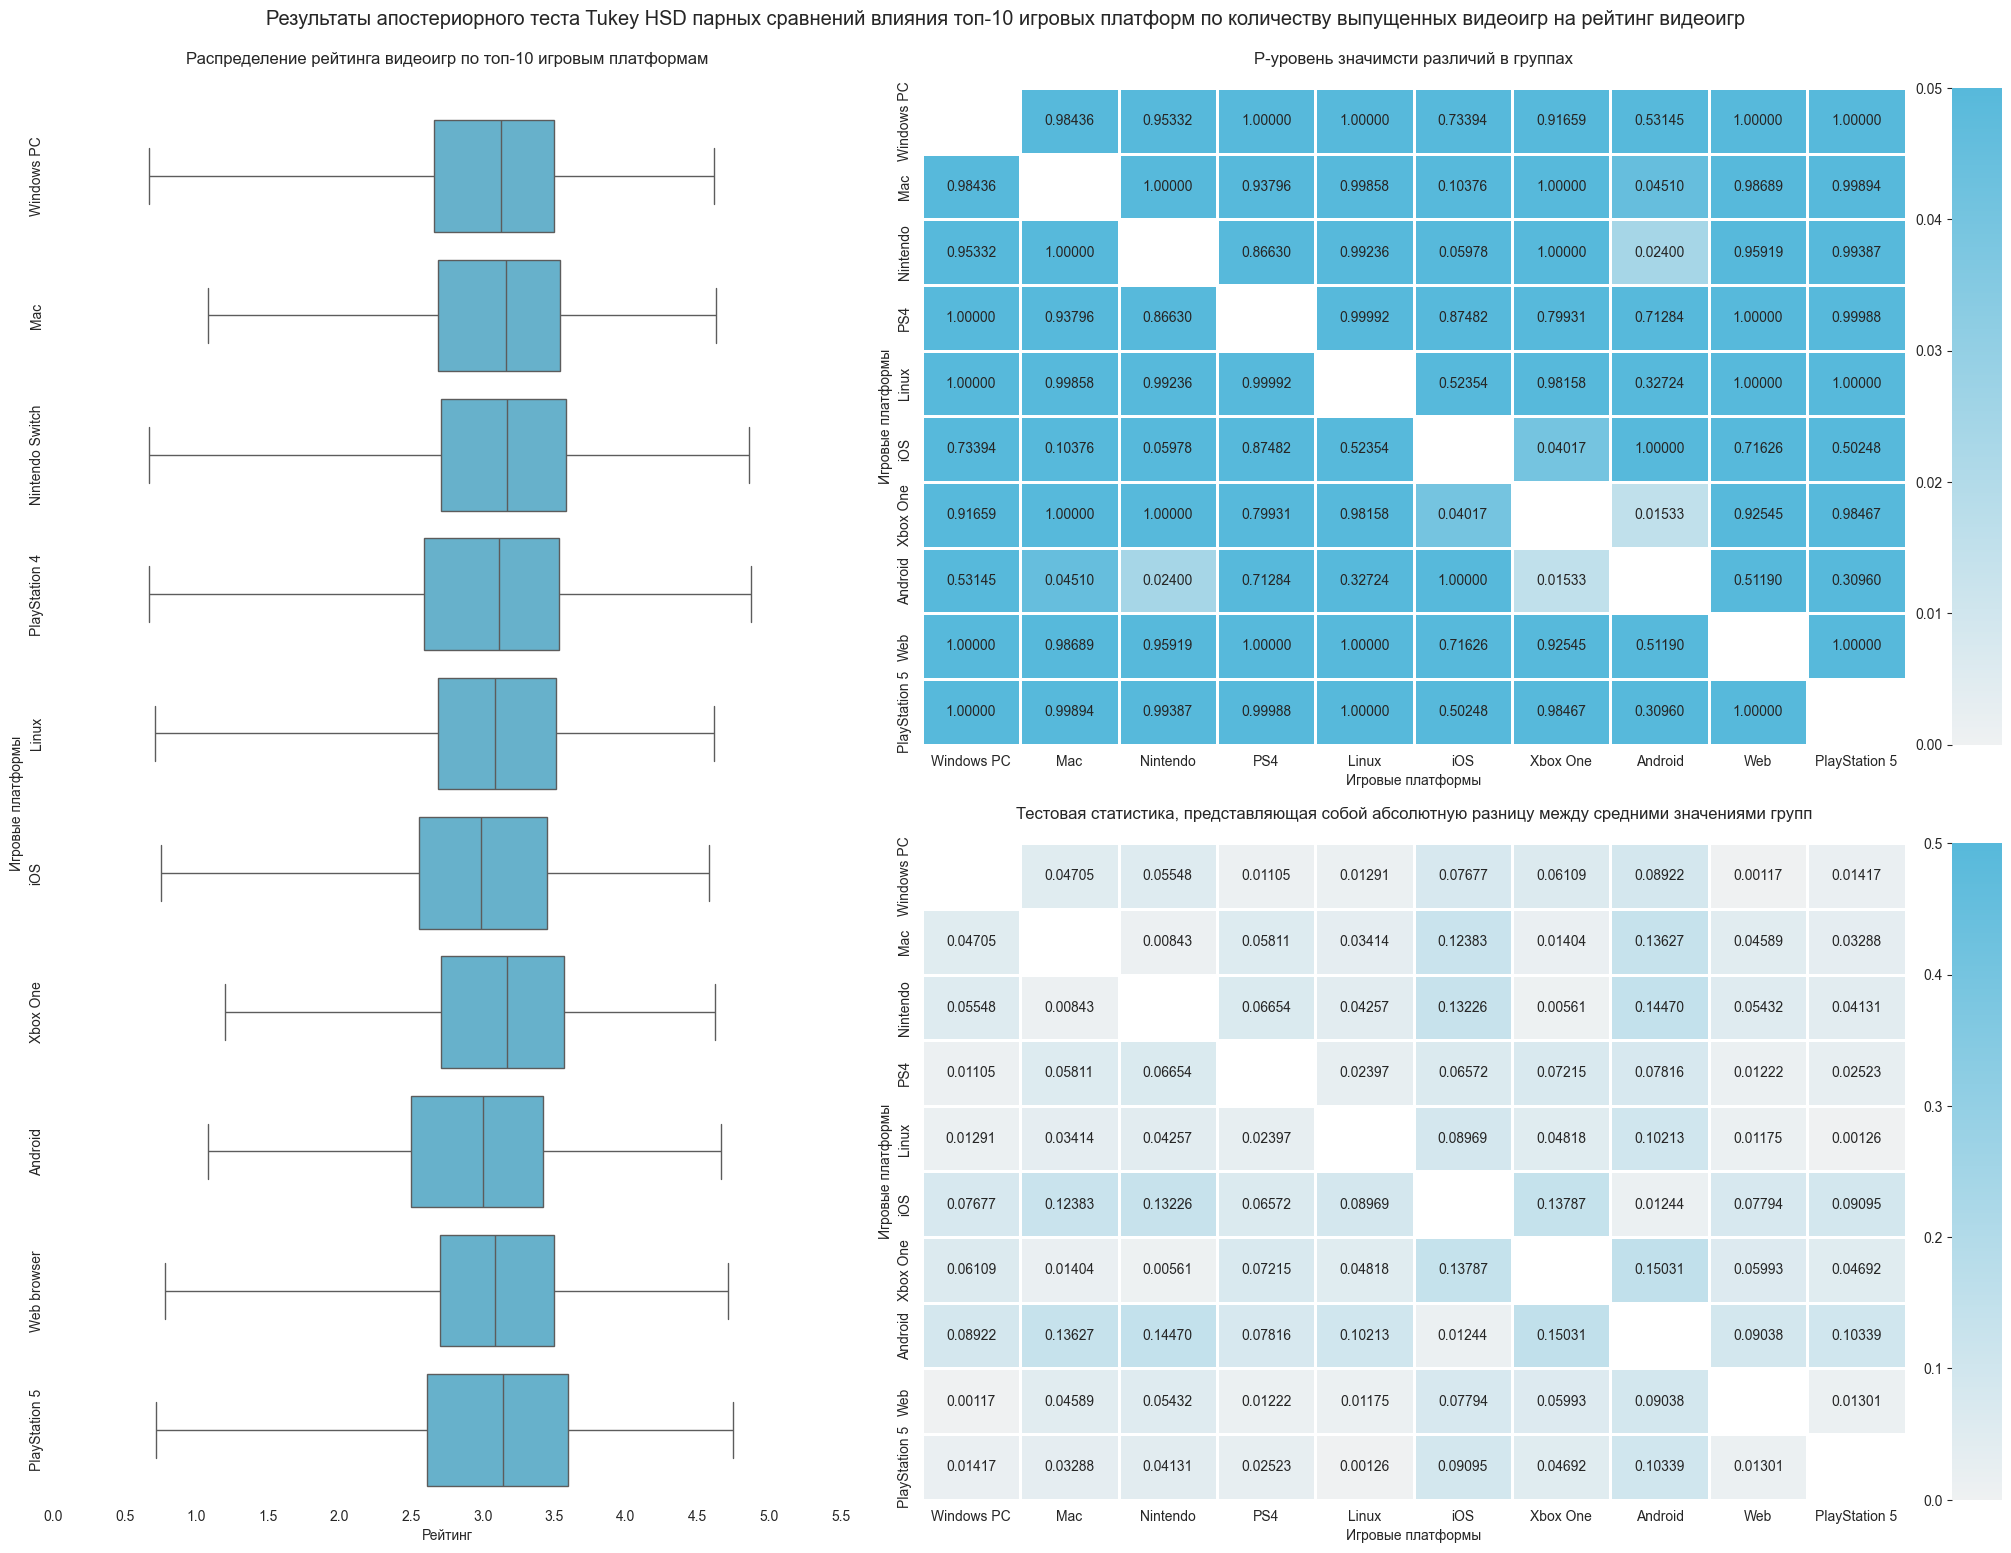

In [41]:
figure = plt.figure(
    layout='constrained', 
    figsize=(20, 15))

figure.suptitle(
    t=('Результаты апостериорного теста Tukey HSD парных сравнений '
       'влияния топ-10 игровых платформ по количеству выпущенных видеоигр '
       'на рейтинг видеоигр'), 
    y=1.025, 
    fontsize='x-large'
)

subfigures: list[plt.Figure] = list(figure.subfigures(
    nrows=1,
    ncols=2,
    hspace=0.05,
    width_ratios=[0.75, 1]
))

grid = GridSpec(
    figure=subfigures[1],
    nrows=2,
    ncols=2,
    wspace=0.01,
    hspace=0.025,
    width_ratios=[1, 0.05]
)

subfigures[0].add_subplot()
subfigures[1].add_subplot(grid[0, 0])
subfigures[1].add_subplot(grid[0, 1])
subfigures[1].add_subplot(grid[1, 0])
subfigures[1].add_subplot(grid[1, 1])

platforms = df['platforms']['platform'].value_counts().iloc[:10]

plot_data = (groups
             .unstack()
             .reset_index(level=0)
             .rename(
                 columns={'level_0': 'platforms', 0: 'values'}
             ))

sns.boxplot(
    data=plot_data,
    x='values',
    y='platforms',
    whis=(0, 100),
    ax=subfigures[0].axes[0],
    color=sns.color_palette('hls', 15)[8], 
    fliersize=3
)

subfigures[0].axes[0].set_title(
    label=('Распределение рейтинга видеоигр '
           'по топ-10 игровым платформам'),
    y=1.025,
    fontsize='large'
)
subfigures[0].axes[0].set_xlabel('Рейтинг')
subfigures[0].axes[0].set_ylabel('Игровые платформы')
subfigures[0].axes[0].set_xticks(np.linspace(0.0, 5.5, 12))
subfigures[0].axes[0].set_xbound((0.0, 5.5))
subfigures[0].axes[0].set_yticks(
    ticks=np.arange(10), 
    labels=platforms.index,
    rotation=90,
    verticalalignment='center'
)
for s in 'top', 'right', 'bottom', 'left':
    subfigures[0].axes[0].spines[s].set_visible(False)

labels = (platforms
          .rename(index={'Nintendo Switch': 'Nintendo',
                         'Web browser': 'Web',
                         'PlayStation 2': 'PS2',
                         'PlayStation 4': 'PS4'})
          .index)

plot_data = (table['p-value']
             .unstack(0)[platforms.index]
             .sort_index(key=lambda x: platforms.rank()[x], 
                         ascending=False))

sns.heatmap(
    data=plot_data,
    ax=subfigures[1].axes[0],
    annot=True,
    linewidths=1.0,
    fmt='.5f', 
    cmap=sns.color_palette('light:#57b9db', as_cmap=True),
    cbar_ax=subfigures[1].axes[1],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.0,
    vmax=0.05
)

subfigures[1].axes[0].set_title(
    label='P-уровень значимсти различий в группах',
    y=1.025,
    fontsize='large'
)
subfigures[1].axes[0].set_xlabel('Игровые платформы')
subfigures[1].axes[0].set_ylabel('Игровые платформы')
subfigures[1].axes[0].set_xticks(
    ticks=np.linspace(0.5, 9.5, 10), 
    labels=labels,
)
subfigures[1].axes[0].set_yticks(
    ticks=np.linspace(0.5, 9.5, 10), 
    labels=labels,
    rotation=90,
    verticalalignment='center'
)
subfigures[1].axes[1].set_yticks(np.linspace(0., 0.05, 6))
subfigures[1].axes[1].set_ybound((0., 0.05))

plot_data = (table['statistic']
             .unstack(0)[platforms.index]
             .sort_index(key=lambda x: platforms.rank()[x], ascending=False)
             .abs())
             
sns.heatmap(
    data=plot_data,
    ax=subfigures[1].axes[2],
    annot=True,
    linewidths=1.0,
    fmt='.5f', 
    cmap=sns.color_palette('light:#57b9db', as_cmap=True),
    cbar_ax=subfigures[1].axes[3],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.0,
    vmax=0.5
)

subfigures[1].axes[2].set_title(
    label=('Тестовая статистика, '
           'представляющая собой абсолютную разницу '
           'между средними значениями групп'),
    y=1.025,
    fontsize='large'
)

subfigures[1].axes[2].set_xlabel('Игровые платформы')
subfigures[1].axes[2].set_ylabel('Игровые платформы')
subfigures[1].axes[2].set_xticks(
    ticks=np.linspace(0.5, 9.5, 10), 
    labels=labels,
)
subfigures[1].axes[2].set_yticks(
    ticks=np.linspace(0.5, 9.5, 10), 
    labels=labels,
    rotation=90,
    verticalalignment='center'
)
subfigures[1].axes[3].set_ybound((0., 0.5))
subfigures[1].axes[3].set_yticks(np.linspace(0., 0.5, 6));

По результатам апостериорного теста множественного сравнения **Tukey HSD**, статистически значемые различия рейтинга наблюдаются только в нескольких группах. Наибольшее различие наблюдается между игровыми платформами **Android** и **Xbox One** (различие среднего значения в группах более **0.15**).

#### Игровой жанр

Сформируем группы с помощью протсых случайных выборок.

In [42]:
size = 500
data = (df['genres']
        .join(df['games'].set_index('id'), on='id')[['genre', 'rating']])
groups = pd.DataFrame(index=range(size))
for platform in df['genres']['genre'].value_counts().iloc[:10].index:
    group = pd.DataFrame(
        data={platform: (data
                         .loc[(data['genre'] == platform) & (data['rating'].notna()), 'rating']
                         .sample(
                             n=size, 
                             random_state=RANDOM_STATE,
                             ignore_index=True
                             )
                        )
             }
    )
    groups = groups.join(group, how='inner')
groups

,Adventure,Simulator,RPG,Strategy,Shooter,Puzzle,Arcade,Platform,Sport,Visual Novel
0,3.500000,3.166667,2.103448,3.320714,4.010811,3.340909,1.666667,0.900000,3.029412,2.785714
1,2.357143,3.236559,2.222222,3.161600,1.583333,2.428571,3.000000,2.785867,2.600000,2.934426
2,4.461000,3.545455,4.333333,4.100000,2.784913,2.263158,2.944444,2.361111,3.310606,2.550000
3,3.437500,3.833333,2.812500,3.237589,1.041667,2.618421,3.214286,3.531340,2.755102,3.000000
4,2.400000,3.450000,3.333333,3.206897,4.079545,1.340000,1.304878,2.200000,3.500000,2.750000
...,...,...,...,...,...,...,...,...,...,...
495,2.400000,3.644737,3.600855,3.636364,1.400000,2.400000,3.864679,3.506329,3.081998,3.289474
496,2.277778,2.450000,2.557018,3.263158,3.250000,2.815385,3.125000,3.285714,3.333333,3.900000
497,1.782609,3.507463,3.384615,3.427083,3.142857,4.083333,3.357143,3.840659,2.058140,4.353333
498,3.282609,2.250000,3.147059,3.271960,2.500000,3.246849,3.269231,1.916667,1.444444,4.036592


Воспользуемся **тестом Бартлетта**, чтобы проверить выборки на равенство дисперсий. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: дисперсии популяций, из которых взяты выборки, **равны**.
- **H1**: дисперсии популяций, из которых взяты выборки, **не равны**.

Установим p-уровень значимости **0.05** и проведем **тест Бартлетта**.

In [43]:
result = stats.bartlett(*groups.T.to_numpy())
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 15.75944.
p-value: 7.20783e-02


Воспользуемся **ANOVA**, чтобы оценить влияние игровой платформы на ретийнг видеоигр. Для этого сформулируем основную (**H0**) и альтернативную (**H1**) гипотезы:
- **H0**: средние значения популяций, из которых взяты выборки, **равны**.
- **H1**: средние значения популяций, из которых взяты выборки, **не равны**.

Установим p-уровень значимости **0.05** и проведем **ANOVA**.

In [44]:
result = stats.f_oneway(*groups.T.to_numpy())
print(f'Статистика: {result.statistic:.5f}.')
print(f'p-value: {result.pvalue:.5e}')

Статистика: 15.47095.
p-value: 3.50247e-25


По результатам **ANOVA** нельзя утверждать, что среднее значение рейтинга видеоигр не имеет статистически значимых различий, в зависимости от жанра, в котором была выпущенна видеоигра.

Используем апостериорный тест множественного сравнения **Tukey HSD** для попарного сравнения всех групп.

In [45]:
results = stats.tukey_hsd(*groups.T.to_numpy())

In [46]:
genres = (df['genres']['genre']
             .value_counts()
             .iloc[:10]
             .index
             .tolist())
table = pd.DataFrame(
    index=pd.MultiIndex.from_arrays(
        arrays=[[genre for genre in genres for _ in range(9)], 
                [x for i in range(10) for j, x in zip(range(10), genres) if i != j]]
    )
)

result = (results.statistic, 
          results.pvalue, 
          results.confidence_interval()[0], 
          results.confidence_interval()[1])

for i, statistics, pvalues, lowers, uppers in zip(range(10), *result):
    for j, statistic, pvalue, lower, upper in zip(range(10), statistics, pvalues, lowers, uppers): 
        if i != j:
            columns = ['statistic', 'p-value', 'lower CI', 'upper CI']
            table.loc[(genres[i], genres[j]), columns] = statistic, pvalue, lower, upper

(table
 .style
 .format(lambda x: f'{x:.5f}'))

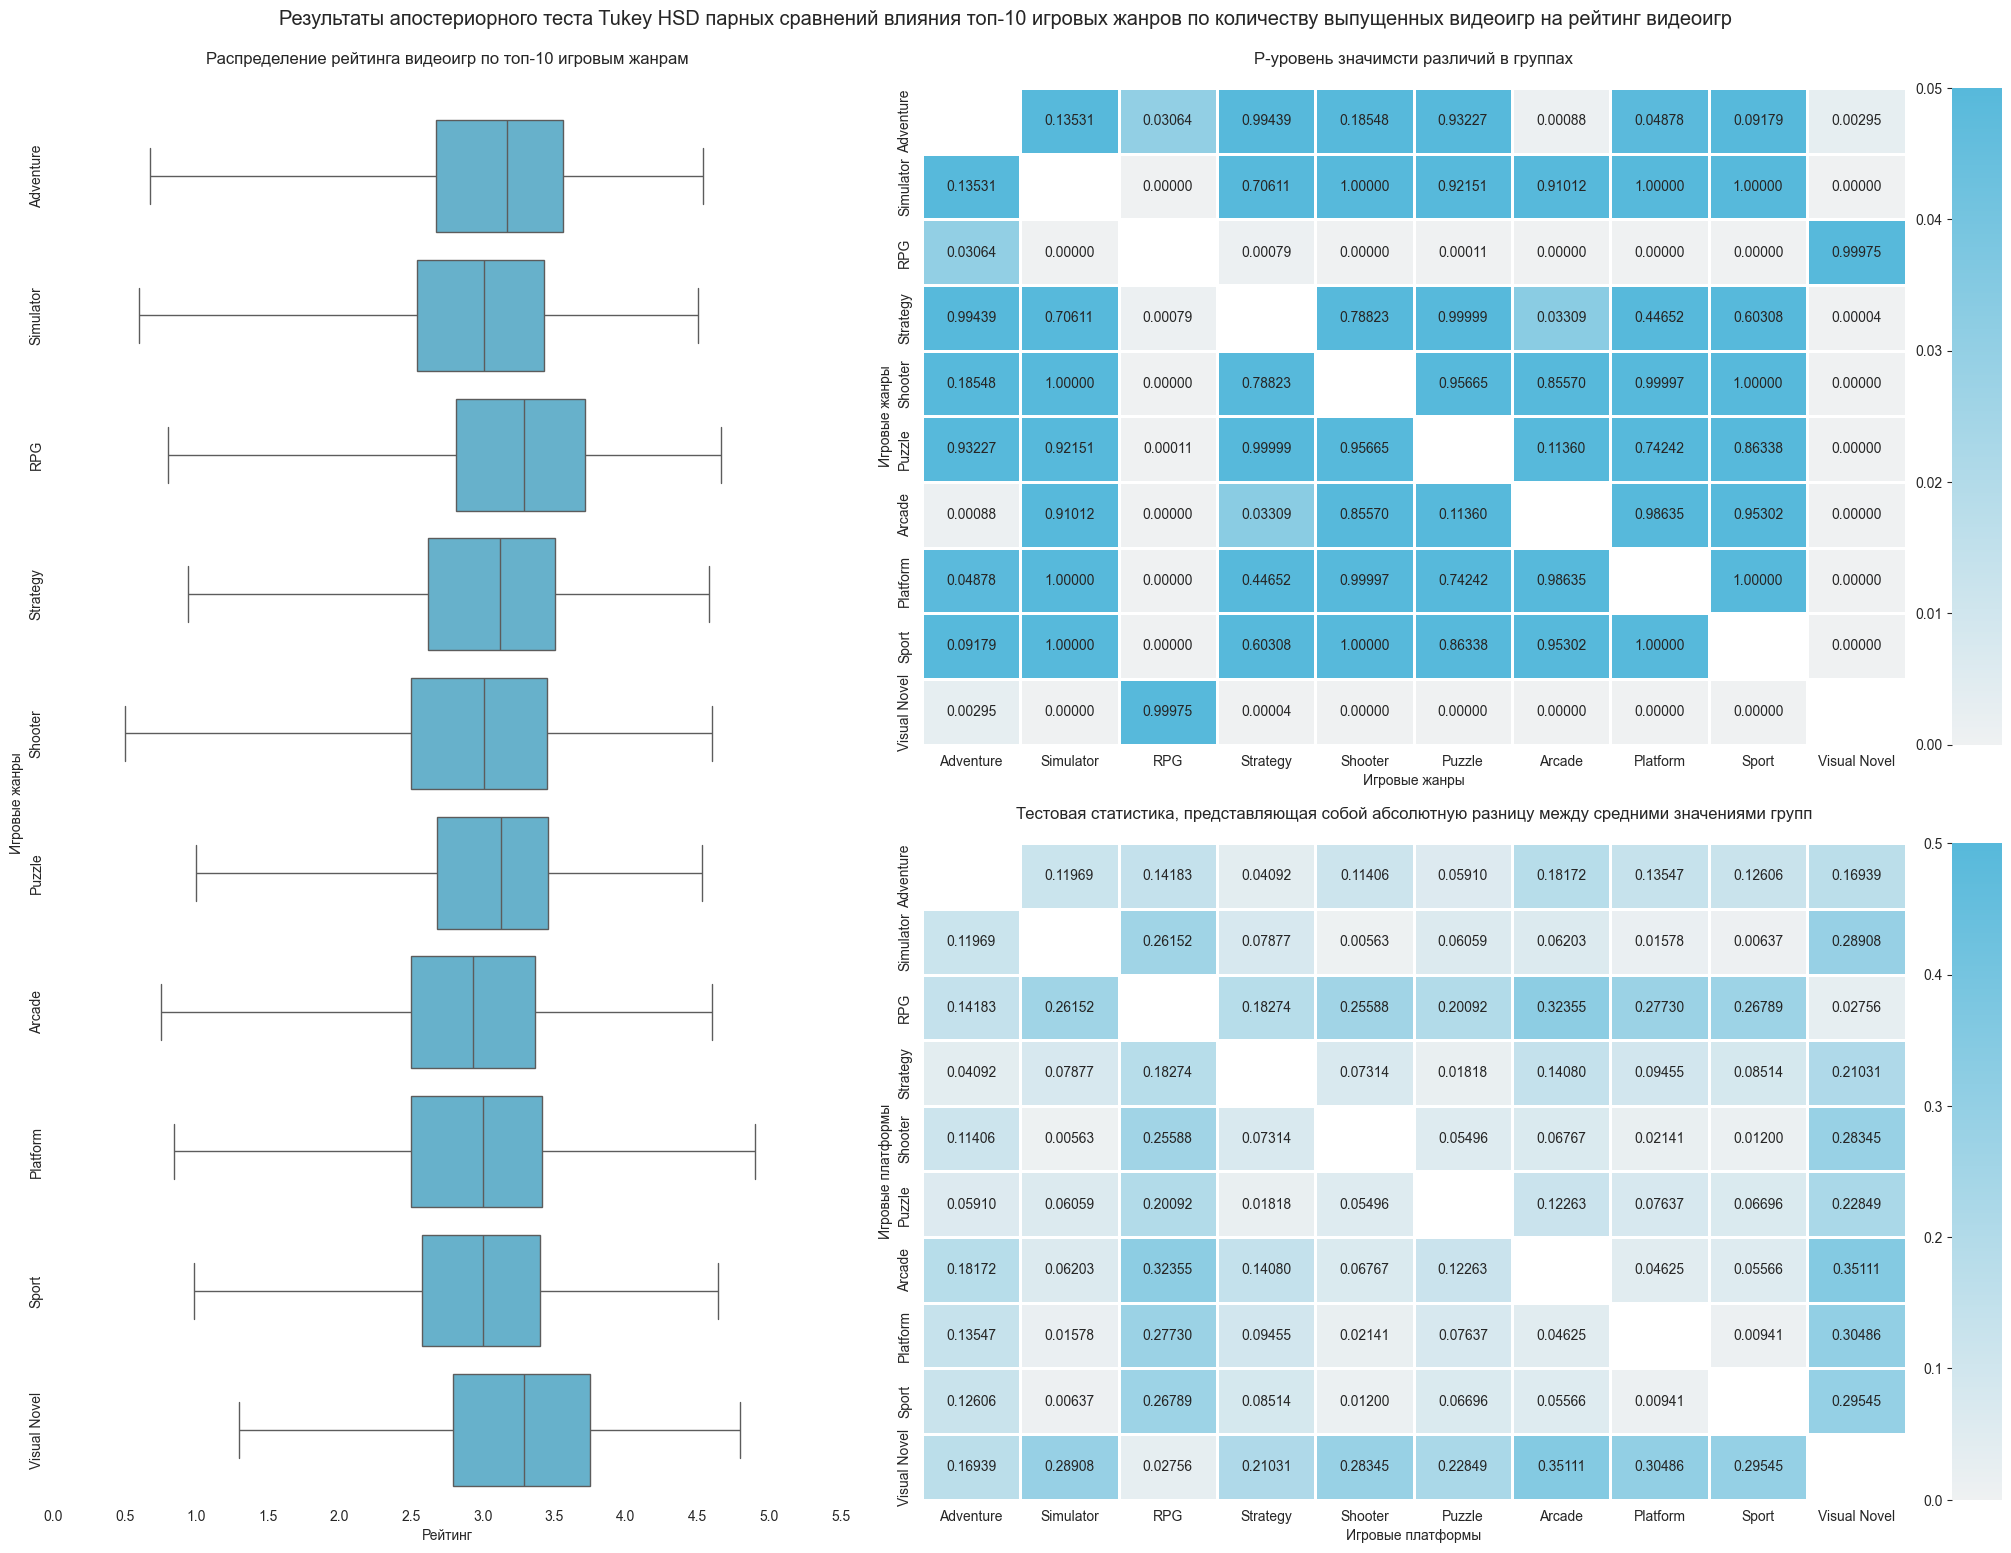

In [47]:
figure = plt.figure(
    layout='constrained', 
    figsize=(20, 15))

figure.suptitle(
    t=('Результаты апостериорного теста Tukey HSD парных сравнений '
       'влияния топ-10 игровых жанров по количеству выпущенных видеоигр '
       'на рейтинг видеоигр'), 
    y=1.025, 
    fontsize='x-large'
)

subfigures: list[plt.Figure] = list(figure.subfigures(
    nrows=1,
    ncols=2,
    hspace=0.05,
    width_ratios=[0.75, 1]
))

grid = GridSpec(
    figure=subfigures[1],
    nrows=2,
    ncols=2,
    wspace=0.01,
    hspace=0.025,
    width_ratios=[1, 0.05]
)

subfigures[0].add_subplot()
subfigures[1].add_subplot(grid[0, 0])
subfigures[1].add_subplot(grid[0, 1])
subfigures[1].add_subplot(grid[1, 0])
subfigures[1].add_subplot(grid[1, 1])

genres = df['genres']['genre'].value_counts().iloc[:10]

plot_data = (groups
             .unstack()
             .reset_index(level=0)
             .rename(
                 columns={'level_0': 'genres', 0: 'values'}
             ))

sns.boxplot(
    data=plot_data,
    x='values',
    y='genres',
    whis=(0, 100),
    ax=subfigures[0].axes[0],
    color=sns.color_palette('hls', 15)[8], 
    fliersize=3
)

subfigures[0].axes[0].set_title(
    label=('Распределение рейтинга видеоигр '
           'по топ-10 игровым жанрам'),
    y=1.025,
    fontsize='large'
)
subfigures[0].axes[0].set_xlabel('Рейтинг')
subfigures[0].axes[0].set_ylabel('Игровые жанры')
subfigures[0].axes[0].set_xticks(np.linspace(0.0, 5.5, 12))
subfigures[0].axes[0].set_xbound((0.0, 5.5))
figure.axes[0].set_yticks(
    ticks=np.arange(10), 
    labels=genres.index,
    rotation=90,
    verticalalignment='center'
)
for s in 'top', 'right', 'bottom', 'left':
    subfigures[0].axes[0].spines[s].set_visible(False)
    
plot_data = (table['p-value']
             .unstack(0)[genres.index]
             .sort_index(key=lambda x: genres.rank()[x], 
                         ascending=False))

sns.heatmap(
    data=plot_data,
    ax=subfigures[1].axes[0],
    annot=True,
    linewidths=1.0,
    fmt='.5f', 
    cmap=sns.color_palette('light:#57b9db', as_cmap=True),
    cbar_ax=subfigures[1].axes[1],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.0,
    vmax=0.05
)

subfigures[1].axes[0].set_title(
    label='P-уровень значимсти различий в группах',
    y=1.025,
    fontsize='large'
)
subfigures[1].axes[0].set_xlabel('Игровые жанры')
subfigures[1].axes[0].set_ylabel('Игровые жанры')

plot_data = (table['statistic']
             .unstack(0)[genres.index]
             .sort_index(key=lambda x: genres.rank()[x], ascending=False)
             .abs())
             
sns.heatmap(
    data=plot_data,
    ax=subfigures[1].axes[2],
    annot=True,
    linewidths=1.0,
    fmt='.5f', 
    cmap=sns.color_palette('light:#57b9db', as_cmap=True),
    cbar_ax=subfigures[1].axes[3],
    cbar_kws={'ticklocation': 'left'},
    vmin=0.0,
    vmax=0.5
)

subfigures[1].axes[2].set_title(
    label=('Тестовая статистика, '
           'представляющая собой абсолютную разницу '
           'между средними значениями групп'),
    y=1.025,
    fontsize='large'
)

subfigures[1].axes[2].set_xlabel('Игровые платформы')
subfigures[1].axes[2].set_ylabel('Игровые платформы')

subfigures[1].axes[1].set_ybound((0., 0.05))
subfigures[1].axes[1].set_yticks(np.linspace(0., 0.05, 6))

subfigures[1].axes[3].set_ybound((0., 0.5))
subfigures[1].axes[3].set_yticks(np.linspace(0., 0.5, 6));

По результатам апостериорного теста множественного сравнения **Tukey HSD**, статистически значемые различия рейтинга наблюдаются во многих группах. Наибольшее различие наблюдается между жанрами **Visual Novel** и **Arcade** (различие среднего значения в группах более **0.35**). 

# Выводы
***

1. Оценка распределения:
    - путем визуальной оценки гистограммы и графика Q-Q можно сделать вывод, что распределение данных рейтинга видеоигр подчиняется закону распределения, который **близок к нормальному**.
    - по результатам теста **Шапиро-Уилка**, **нельзя утверждать**, что рейтинг видеоигр подчиняется **нормальному** закону распределения;
2. Оценка влияния факторов:
    1. Тип разработчика:
        - по результатам двустороннего **t-теста** можно утерждать, что среднее значение рейтинга для видеоигр, выпущенных **крпными компаниями** и **инди-разработчиками не равны**;
        - на коробчатой диаграмме видно, что медиана, 1 и 3 квартили рейтинга видеоигр, выпущенные **инди-разработчиками** имеют меньшие значения, чем у видеоигр, выпущенных **крпными компаниями**.
    2. Игровая платформа
        - по результатам **ANOVA** нельзя утверждать, что среднее значение рейтинга видеоигр не имеет статистически значимых различий, в зависимости от игровой платформы, для которой была выпущенна видеоигра;
        - по результатам апостериорного теста множественного сравнения **Tukey HSD**, статистически значемые различия рейтинга наблюдаются только в нескольких группах. Наибольшее различие наблюдается между игровыми платформами **Android** и **Xbox One** (различие среднего значения в группах более **0.15**).
    3. Игровой жанр:
        - по результатам **ANOVA** нельзя утверждать, что среднее значение рейтинга видеоигр не имеет статистически значимых различий, в зависимости от жанра, в котором была выпущенна видеоигра.
        - по результатам апостериорного теста множественного сравнения **Tukey HSD**, статистически значемые различия рейтинга наблюдаются во многих группах. Наибольшее различие наблюдается между жанрами **Visual Novel** и **Arcade** (различие среднего значения в группах более **0.35**). 